Read time series dataset and load each column as an array
Time-->t
Magnitude-->Y
Error-->e

In [22]:
import numpy as np
from numpy import *

# Load data
ts = np.loadtxt('w.dat', unpack = True)
#print(ts)
# Time(t) and magnitude(Y) and error(e)
t = ts[0]
Y = ts[1]
e = ts[2]
# Mean value, maximum value, minimum value of magnitude
v0 = np.mean(Y)
v_max = np.max(Y)
v_min = np.min(Y)
# max and min difference 
v_diff = v_max - v_min
# Average value of error
e_avg = np.mean(abs(e))

In [23]:
import matplotlib.pyplot as plt

# Plot settings
plt.rcParams['figure.figsize'] = (9,6)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True

# Magnitude of assumed initial point
y_bm_0 = 13.5

# Simulation parameters(T is time period, N is number of points, dt is time interval)
T = t[-1] - t[0]
N = len(t)
dt = T/N
# Array of time points
t_bm = np.arange(t[0], t[-1], dt)

Create Brownian motion

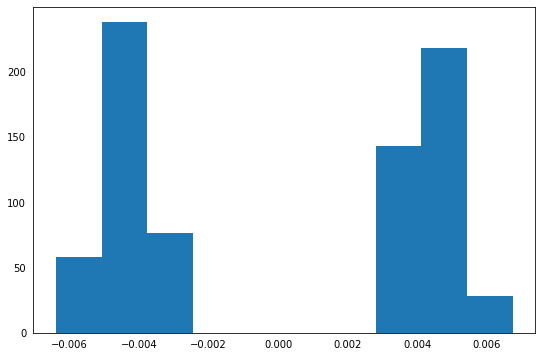

In [24]:
import scipy.stats as stats

# Generate random number 
lower, upper = 0.003, 0.009
mu, sigma = 0.004310750909692359, 0.0007671127621733211
# rdm represents normal distribution with x limitation
rdm = stats.truncnorm(
    (lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
dB = rdm.rvs(N)
# print(a)
# print(random.choice((1,-1)))
# Converted into random positive and random negative
dB_n = []
for item in dB:
    new = item *random.choice((1,-1))
    dB_n.append(new) 

import matplotlib.pyplot as plt
plt.hist(dB_n, density=True)
plt.show()

Generate random number as value of sample for sigma, amplitude, omega and phi to find parameters of v = A*sin(omega*t+phi).  
For each combination of sample parameter, can obtain a value of kai^2 = (v_obs_1-v_exp_1)^2/error_1^2 + (v_obs_2-v_exp_2)^2/error_2^2 +...+ (v_obs_n-v_exp_n)^2/error_n^2 Plot the distribution, the Best value is the minimum value of kai^2
error_i is the third column value(error)

In [26]:
import math
import random

# Setting the sample of sigma dataset in range of [0,2]
sigma_sample = np.linspace(min(e), max(e)-0.002, 5)
# Setting the sample of amplitude dataset in range of [0.1,0.4]
amp_sample = np.linspace(0.01, 0.012, 10)
# Setting the sample of omega dataset in range of [140,160]s
omega_begin = (2 * math.pi) / (150./3600./24.)
omega_end = (2 * math.pi) / (130./3600./24.)
omega_sample = np.linspace(omega_begin, omega_end, 10)
# Setting the sample of omega dataset in range of [0，2*pi/omega]
phi_begin = 0
phi_end = (2*math.pi)/omega_begin
phi_sample = np.linspace(phi_begin, phi_end, 100)

# print(sigma_sample)
# print(amp_sample)
# print(omega_sample)
# print(phi_sample)

sigma_record = []
amp_record = []
omega_record = []
phi_record = []
# Loop for implementing every trial
kai_sample = []
for sigma in sigma_sample:
    for amp in amp_sample:
        for omega in omega_sample:
            for phi in phi_sample:
                # EM Approximatiom
                # Define y_em as calculated value
                y_em = []
                # Define a intial point value for SDE approximation
                X = y_bm_0
                for j in range(N):
                    X +=  amp * omega * math.cos(omega*t_bm[j] + phi) * dt + sigma*X*dB_n[j]
                    y_em.append(X)

                # Loop for calculate sum of differences square(v_obs_j - v_cal_j)^2 of observed value and calculated value for each point
                for i in range(N):
                    terms = []
                    d = Y[i] - y_em[i]
                    terms.append((d**2 / e[i]**2))
                # Calculate kai for each trial
                kai = math.sqrt(np.sum(terms))
                # Collect sample kai**2
                kai_sample.append(kai)
                
                # Collect sample parameters value in pair as one point in kai^2 distribution plot
                sigma_record.append(sigma)
                amp_record.append(amp)
                omega_record.append(omega)
                phi_record.append(phi)

# Obtain the most fitted value with corresponding parameters
# print(kai_sample)
kai_min = min(kai_sample)
index_kai_min = kai_sample.index(kai_min)

# Find corresponding value of parameters
sigma_fit = sigma_record[index_kai_min]
amp_fit = amp_record[index_kai_min]
omega_fit = omega_record[index_kai_min]
phi_fit = phi_record[index_kai_min]

print("Size of kai_sample is:", len(kai_sample))
print("The minimum value is:", kai_min)
print("Corresponding parameter value is:")
print(sigma_fit)
print(amp_fit)
print(omega_fit)
print(phi_fit)
print("Fitted omega value is:", (2*math.pi) / (omega_fit/3600/24))

Size of kai_sample is: 50000
The minimum value is: 0.008918187621144692
Corresponding parameter value is:
0.0058249999999999994
0.010222222222222223
3804.7103644705926
0.001736111111111111
Fitted omega value is: 142.68292682926827


Visualize kai_sample

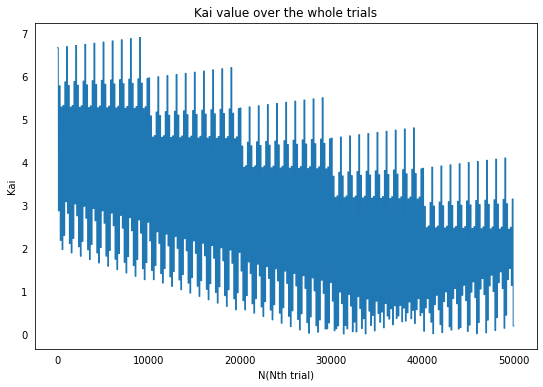

In [27]:
x = np.arange(0, len(kai_sample), 1)
# print(x)
# plt.ylim(42.2, 42.4)
plt.title('Kai value over the whole trials')
plt.ylabel('Kai')
plt.xlabel('N(Nth trial)')
plt.plot(x, kai_sample)

    Plot calculated results using selected random parameters sigma, amplitude, omega and phi

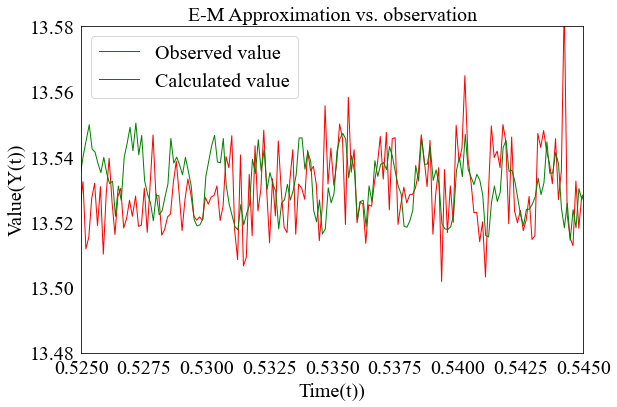

In [34]:
# Fitted value of sigma, amplitude, omega and Phi
sigma = sigma_fit
amp = amp_fit
omega = omega_fit
phi = phi_fit

# EM Approximatiom
# Define y_em as approximate value
y_em = []
# Define a intial point value for SDE approximation
X = y_bm_0
for j in range(N):
    X +=  amp * omega * math.cos(omega*t_bm[j] + phi) * dt + sigma*X*dB_n[j]
    y_em.append(X+dB_n[j])

plt.xlim(0.525, 0.545)
plt.ylim(13.48, 13.58)

# plot  fitted approximation and observed value for comparison
plt.xticks(family='Times New Roman', fontsize=20)
plt.yticks(family='Times New Roman', fontsize=20)
font1 = {"family" : "Times New Roman", "size" : 20}
plt.title('E-M Approximation vs. observation', family='Times New Roman', fontsize=20)
plt.ylabel('Value(Y(t))', family='Times New Roman', fontsize=20)
plt.xlabel('Time(t))', family='Times New Roman', fontsize=20)
plt.plot(t, Y, label = "Observed value", color = 'red')
plt.plot(t_bm, y_em, label="Calculated value", color='green')
plt.legend(loc = 2, prop=font1)